## Plan of Action

*   **CK+ Dataset images** are stored **in separate folders,** named basis their emotion labels:
 *   0 = 'anger', 1 = 'contempt',  2 = 'disgust',    3 = 'fear',    4 = 'happy',    5 = 'sadness',    6 = 'surprise'

* Convert all images to **grayscale**
* **Define emotion labels** basis use case
* Using **X epochs** on our **defined CNN Architecture**, comprising of:
    - an input *Conv2D* layer (with 32 filters) paired with an *MaxPooling2D* layer,
    - 3 pairs of *Conv2D* (with 64, 128 & 256 filters) and *MaxPooling2D* layers,
    - 1 *Dense* layer with 128 nodes, and
    - an output *Dense* layer with 3 nodes.

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/1_LiveProjects/Project5_AgeGenderEmotion_Detection/1.3_emotion_input_output
!ls

[Errno 2] No such file or directory: '/content/drive/My Drive/1_LiveProjects/Project5_AgeGenderEmotion_Detection/1.3_emotion_input_output'
/content
drive  sample_data


# Import Libraties/ Functions

In [3]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from zipfile import ZipFile
import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [4]:
# CK+ 압축 파일 풀기

combined_faces_zip_path = "/content/drive/MyDrive/GraduationCapston/Foreigner_age_predict/emotion/CK+48-20231112T231108Z-001.zip"
extracted_path='/content/combined_faces'
with ZipFile(combined_faces_zip_path, 'r') as myzip:
    myzip.extractall(extracted_path)
    print('Done unzipping combined_faces.zip')

Done unzipping combined_faces.zip


# Import Dataset

In [5]:
dataset_folder='/content/combined_faces/CK+48'
sub_folders=os.listdir(dataset_folder)

sub_folders

['happy', 'surprise', 'sadness', 'contempt', 'anger', 'fear', 'disgust']

In [26]:
# Reading folder names as labels and images underneath
i=0
last=[]
images=[]
labels=[]
temp = sub_folders

# reading folders in the main dataset folder, one at a time
for sub_folder in sub_folders:
  sub_folder_index = temp.index(sub_folder)
   # 폴더의 인덱스를 출력합니다.
  print(f"Folder: {sub_folder}, Index: {sub_folder_index}")
  label = sub_folder_index

  # Define labels basis use case. We are using positive:0, negative:1, neutral:2
  # for our use case of predicting emotions of visitors entering a retail store
  if  label in [0, 1]:    # label in ['happy', 'surprise']
    new_label=0           # changed to label = positive emotion
  else:                   # label in ['anger','sadness','contempt', 'disgust', 'fear']
    new_label=1           # changed to label = negative emotion





  path = dataset_folder+'/'+sub_folder
  sub_folder_images= os.listdir(path)

  # reading images in the sub folder, one at a time
  for image in sub_folder_images:
    image_path = path+'/'+image
    print(image_path+"\t"+str(new_label))

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image= cv2.resize(image,(48,48))
    images.append(image)
    labels.append(new_label)
    i+=1
  last.append(i)

Folder: happy, Index: 0
/content/combined_faces/CK+48/happy/S076_006_00000019.png	0
/content/combined_faces/CK+48/happy/S106_006_00000011.png	0
/content/combined_faces/CK+48/happy/S132_006_00000021.png	0
/content/combined_faces/CK+48/happy/S072_006_00000021.png	0
/content/combined_faces/CK+48/happy/S068_002_00000013.png	0
/content/combined_faces/CK+48/happy/S115_008_00000015.png	0
/content/combined_faces/CK+48/happy/S035_006_00000017.png	0
/content/combined_faces/CK+48/happy/S032_006_00000015.png	0
/content/combined_faces/CK+48/happy/S078_004_00000027.png	0
/content/combined_faces/CK+48/happy/S095_007_00000019.png	0
/content/combined_faces/CK+48/happy/S091_003_00000021.png	0
/content/combined_faces/CK+48/happy/S124_007_00000024.png	0
/content/combined_faces/CK+48/happy/S044_003_00000014.png	0
/content/combined_faces/CK+48/happy/S109_006_00000015.png	0
/content/combined_faces/CK+48/happy/S014_005_00000015.png	0
/content/combined_faces/CK+48/happy/S066_003_00000012.png	0
/content/combine

In [38]:
images_x = np.array(images)
labels_y = np.array(labels)

# we divide image pixels by 255 to reduce computation power
images_x = images_x/255

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [28]:
images_x.shape

(981, 48, 48)

In [29]:
# encoding the labels
num_of_classes = 2
labels_y_encoded = tf.keras.utils.to_categorical(labels_y,num_classes=num_of_classes)

# Split into Train / Test

In [30]:
X_train, X_test, Y_train, Y_test= train_test_split(images_x, labels_y_encoded,test_size=0.25, random_state=10)

In [31]:
len(X_train)

735

In [32]:
len(X_test)

246

# Define CNN Architecture

In [39]:
input = Input(shape = (48,48,1))

conv1 = Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)

conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)

conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)

conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)

flatten = Flatten()(pool4)

dense_1 = Dense(128,activation='relu')(flatten)

drop_1 = Dropout(0.2)(dense_1)

num_of_classes = 2  # 또는 다른 클래스 수
output = Dense(num_of_classes, activation="softmax")(drop_1)

In [40]:
model = Model(inputs=input,outputs=output)
#model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 dropout_12 (Dropout)        (None, 48, 48, 32)        0         
                                                                 
 activation_8 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 24, 24, 64)        18496     
                                                           

In [41]:
# 가정: Y_train 및 Y_test가 원-핫 인코딩되어 있다면, 이를 다시 이진 형식으로 변환합니다.
Y_train_binary = np.argmax(Y_train, axis=1)
Y_test_binary = np.argmax(Y_test, axis=1)

# Model Training

In [42]:
fle_s='/content/drive/MyDrive/GraduationCapston/Foreigner_age_predict/emotion/vgg16_emotion_model.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [43]:
save = model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=50,callbacks=[callback_list],shuffle=True)

Epoch 1/50
23/23 [==============================] - ETA: 0s - loss: 0.8964 - accuracy: 0.5170
Epoch 1: loss improved from inf to 0.89644, saving model to /content/drive/MyDrive/GraduationCapston/Foreigner_age_predict/emotion/vgg16_emotion_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 20s 341ms/step - loss: 0.8964 - accuracy: 0.5170 - val_loss: 0.8131 - val_accuracy: 0.5285
Epoch 2/50
19/23 [=======================>......] - ETA: 0s - loss: 0.7596 - accuracy: 0.6118
Epoch 2: loss improved from 0.89644 to 0.74688, saving model to /content/drive/MyDrive/GraduationCapston/Foreigner_age_predict/emotion/vgg16_emotion_model.h5
23/23 [==============================] - 0s 12ms/step - loss: 0.7469 - accuracy: 0.6299 - val_loss: 0.6290 - val_accuracy: 0.7886
Epoch 3/50
19/23 [=======================>......] - ETA: 0s - loss: 0.4604 - accuracy: 0.8355
Epoch 3: loss improved from 0.74688 to 0.46149, saving model to /content/drive/MyDrive/GraduationCapston/Foreigner_age_predict/emotion/vgg16_emotion_model.h5
23/23 [==============================] - 0s 11ms/step - loss: 0.4615 - accuracy: 0.8340 - val_loss: 0.3876 - val_accuracy: 0.8902
Epoch 4/50
19/23 [=======================>......] - ETA: 0s - loss: 0.3124 - accuracy: 0.9112
Epoch 4: l

In [44]:
# 테스트 데이터셋에서 모델 평가

final_vgg16_score = model.evaluate(X_test, verbose=1)

8/8 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.0000e+00


In [45]:
# 모델을 나중에 사용할 수 있도록 h5 파일로 저장.

model.save(f"/content/drive/MyDrive/GraduationCapston/Foreigner_age_predict/emotion/emotion_model_acc_{round(final_vgg16_score[1], 3)}.h5", save_format='h5')

# Model Performance

In [46]:
# Checking the train and test loss and accuracy values from the neural network above.

train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

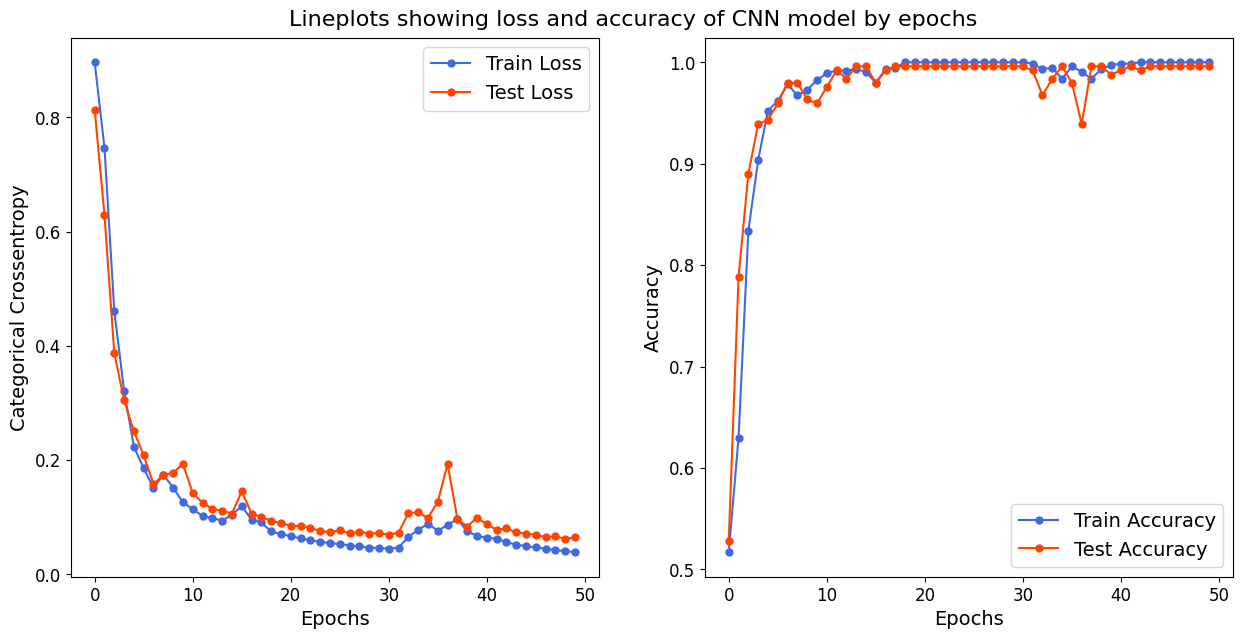

In [47]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)